# CIC IoMT 2024 Dataset - Exploratory Data Analysis

This notebook performs exploratory data analysis on the CIC IoMT 2024 WiFi MQTT dataset to understand:
- Dataset structure and dimensions
- Feature distributions
- Target variable (attack labels) distribution
- Missing values and data quality
- Class imbalance analysis
- Basic statistical summaries


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from pathlib import Path

# Add src to path for imports
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
sys.path.insert(0, str(BASE_DIR / 'src'))

# Import common utilities
from utils import get_project_paths, load_datasets, remove_exact_duplicates

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



## 1. Load Dataset


In [ ]:
# Load datasets using common utility
paths = get_project_paths()
train_df, test_df = load_datasets()

print(f"✓ Training: {train_df.shape} | Test: {test_df.shape}")


Dataset loaded successfully!
Training set shape: (7160831, 46)
Test set shape: (1614182, 46)


## 2. Dataset Overview


In [4]:
display(train_df.head(3))

print("\n" + "=" * 80)
print("TRAINING SET - Basic Info:")
print("=" * 80)
train_df.info()


,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IGMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,683.500000,17.000000,64.0,553148.437500,553148.437500,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.0000,50.00000,0.000000,50.00000,101635944.0,9.5,10.000000,0.000000,0.000000,0.000000,141.5,TCP_IP-DDoS-UDP2_train
1,1745.920044,16.125000,64.0,29919.544922,29919.544922,0,0.0,0.0,0.0,0.040009,0.080017,0.0,0.0,0.0,0.0,0.0,0.119995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080017,0.919922,0.0,0.0,0.0,0.0,1.0,1.0,534.5,50.0,56.1250,50.53125,1.569336,52.28125,84696616.0,9.5,10.046875,2.152344,11.785338,0.229980,141.5,TCP_IP-DDoS-UDP2_train
2,2830.360107,15.789062,64.0,27075.605469,27075.605469,0,0.0,0.0,0.0,0.059998,0.109985,0.0,0.0,0.0,0.0,0.0,0.160034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109985,0.890137,0.0,0.0,0.0,0.0,1.0,1.0,563.0,50.0,74.4375,53.65625,7.449219,53.25000,84696616.0,9.5,10.351562,10.554688,113.675461,0.529785,141.5,TCP_IP-DDoS-UDP2_train



TRAINING SET - Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160831 entries, 0 to 7160830
Data columns (total 46 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Header_Length    float32 
 1   Protocol Type    float16 
 2   Duration         float16 
 3   Rate             float32 
 4   Srate            float32 
 5   Drate            int8    
 6   fin_flag_number  float16 
 7   syn_flag_number  float16 
 8   rst_flag_number  float16 
 9   psh_flag_number  float16 
 10  ack_flag_number  float16 
 11  ece_flag_number  float16 
 12  cwr_flag_number  float16 
 13  ack_count        float16 
 14  syn_count        float16 
 15  fin_count        float16 
 16  rst_count        float16 
 17  HTTP             float16 
 18  HTTPS            float16 
 19  DNS              float16 
 20  Telnet           float16 
 21  SMTP             float16 
 22  SSH              float16 
 23  IRC              float16 
 24  TCP              float16 
 25  UDP              

In [5]:
# Check column names
print("=" * 80)
print("FEATURE COLUMNS:")
print("=" * 80)
print(f"Total number of features: {len(train_df.columns) - 1}")  # Excluding label
print(f"Total columns (including label): {len(train_df.columns)}")
print("\nColumn names:")
for i, col in enumerate(train_df.columns, 1):
    print(f"{i:2d}. {col}")


FEATURE COLUMNS:
Total number of features: 45
Total columns (including label): 46

Column names:
 1. Header_Length
 2. Protocol Type
 3. Duration
 4. Rate
 5. Srate
 6. Drate
 7. fin_flag_number
 8. syn_flag_number
 9. rst_flag_number
10. psh_flag_number
11. ack_flag_number
12. ece_flag_number
13. cwr_flag_number
14. ack_count
15. syn_count
16. fin_count
17. rst_count
18. HTTP
19. HTTPS
20. DNS
21. Telnet
22. SMTP
23. SSH
24. IRC
25. TCP
26. UDP
27. DHCP
28. ARP
29. ICMP
30. IGMP
31. IPv
32. LLC
33. Tot sum
34. Min
35. Max
36. AVG
37. Std
38. Tot size
39. IAT
40. Number
41. Magnitue
42. Radius
43. Covariance
44. Variance
45. Weight
46. label


## 3. Missing Values Analysis


In [6]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS:")
print("=" * 80)

missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_df = pd.DataFrame({
    'Training Set': missing_train,
    'Test Set': missing_test,
    'Total Missing': missing_train + missing_test
})

missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values('Total Missing', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("✓ No missing values found in the dataset!")


MISSING VALUES ANALYSIS:
✓ No missing values found in the dataset!


## 4. Target Variable (Label) Analysis


In [7]:
# Analyze label distribution
print("=" * 80)
print("TARGET VARIABLE (LABEL) ANALYSIS:")
print("=" * 80)

# Get unique labels
train_labels = train_df['label'].value_counts()
test_labels = test_df['label'].value_counts()

print(f"\nNumber of unique classes in training set: {train_df['label'].nunique()}")
print(f"Number of unique classes in test set: {test_df['label'].nunique()}")

print("\n" + "-" * 80)
print("TRAINING SET - Label Distribution:")
print("-" * 80)
display(train_labels)

print("\n" + "-" * 80)
print("TEST SET - Label Distribution:")
print("-" * 80)
display(test_labels)


TARGET VARIABLE (LABEL) ANALYSIS:

Number of unique classes in training set: 51
Number of unique classes in test set: 21

--------------------------------------------------------------------------------
TRAINING SET - Label Distribution:
--------------------------------------------------------------------------------


label
TCP_IP-DDoS-UDP2_train          207295
TCP_IP-DDoS-UDP3_train          206604
TCP_IP-DDoS-UDP4_train          206343
TCP_IP-DDoS-UDP1_train          206170
TCP_IP-DDoS-UDP5_train          205507
                                 ...  
ARP_Spoofing_train               16047
MQTT-DoS-Connect_Flood_train     12773
MQTT-Malformed_Data_train         5130
Recon-VulScan_train               2173
Recon-Ping_Sweep_train             740
Name: count, Length: 51, dtype: int64


--------------------------------------------------------------------------------
TEST SET - Label Distribution:
--------------------------------------------------------------------------------


label
TCP_IP-DDoS-UDP1_test          205654
TCP_IP-DDoS-ICMP2_test         195692
TCP_IP-DDoS-TCP_test           182598
TCP_IP-DDoS-SYN_test           172397
TCP_IP-DDoS-UDP2_test          156416
                                ...  
MQTT-DoS-Connect_Flood_test      3131
MQTT-Malformed_Data_test         1747
ARP_Spoofing_test                1744
Recon-VulScan_test               1034
Recon-Ping_Sweep_test             186
Name: count, Length: 21, dtype: int64

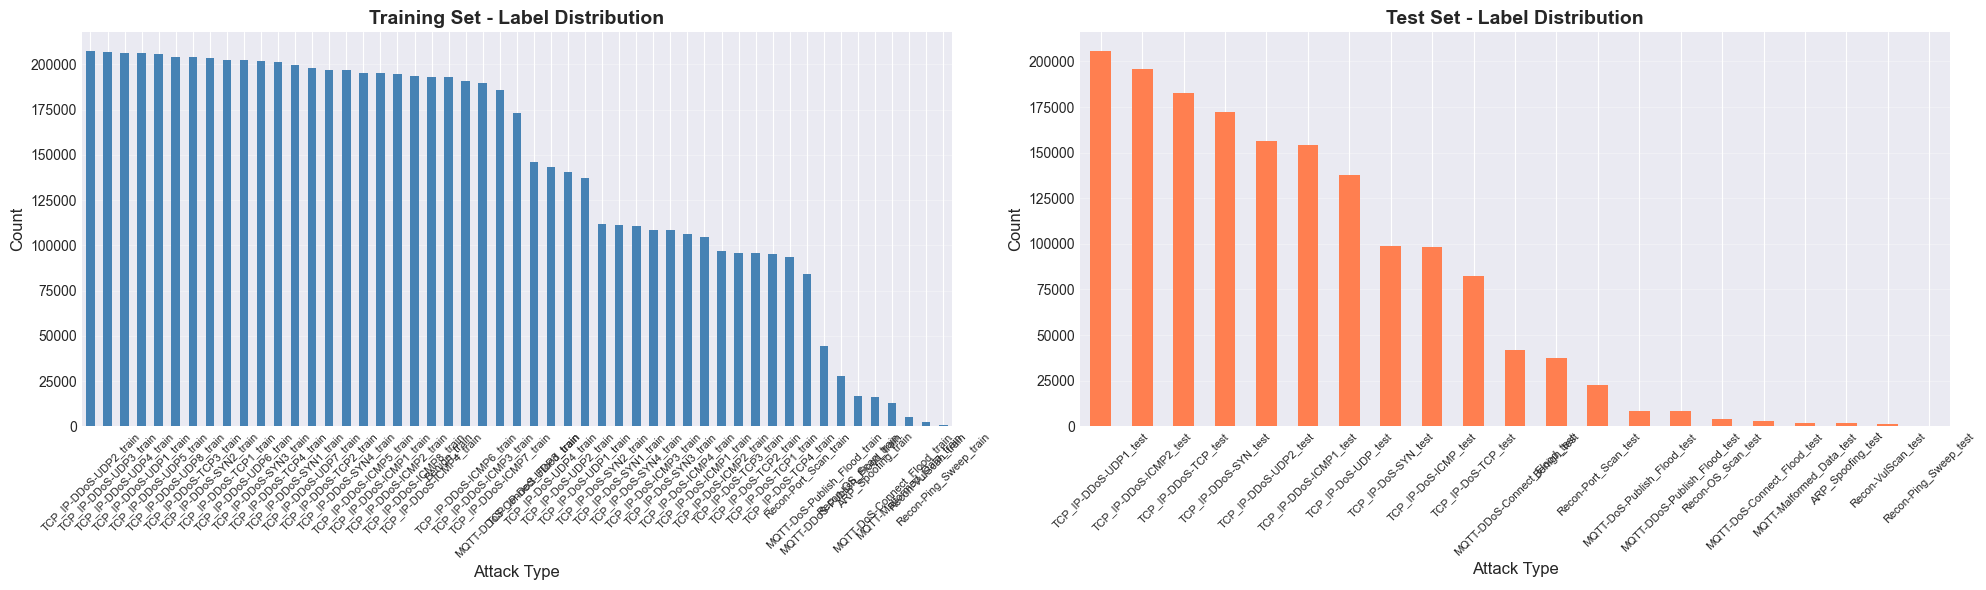


CLASS IMBALANCE ANALYSIS:

Training Set - Class Proportions (%):
  TCP_IP-DDoS-UDP2_train                  :   2.89%
  TCP_IP-DDoS-UDP3_train                  :   2.89%
  TCP_IP-DDoS-UDP4_train                  :   2.88%
  TCP_IP-DDoS-UDP1_train                  :   2.88%
  TCP_IP-DDoS-UDP5_train                  :   2.87%
  TCP_IP-DDoS-UDP8_train                  :   2.85%
  TCP_IP-DDoS-TCP3_train                  :   2.85%
  TCP_IP-DDoS-SYN2_train                  :   2.84%
  TCP_IP-DDoS-TCP1_train                  :   2.83%
  TCP_IP-DDoS-UDP6_train                  :   2.82%
  TCP_IP-DDoS-SYN3_train                  :   2.82%
  TCP_IP-DDoS-TCP4_train                  :   2.81%
  TCP_IP-DDoS-SYN1_train                  :   2.78%
  TCP_IP-DDoS-UDP7_train                  :   2.76%
  TCP_IP-DDoS-TCP2_train                  :   2.75%
  TCP_IP-DDoS-SYN4_train                  :   2.75%
  TCP_IP-DDoS-ICMP5_train                 :   2.72%
  TCP_IP-DDoS-ICMP1_train                 :   2.72

In [8]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Training set
train_labels.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Training Set - Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attack Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].grid(axis='y', alpha=0.3)

# Test set
test_labels.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Test Set - Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Attack Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate class imbalance
print("\n" + "=" * 80)
print("CLASS IMBALANCE ANALYSIS:")
print("=" * 80)
train_proportions = train_labels / len(train_df) * 100
print("\nTraining Set - Class Proportions (%):")
for label, prop in train_proportions.items():
    print(f"  {label:40s}: {prop:6.2f}%")


## 5. Statistical Summary


In [9]:
# Statistical summary of features (excluding label)
feature_cols = [col for col in train_df.columns if col != 'label']

print("=" * 80)
print("STATISTICAL SUMMARY OF FEATURES:")
print("=" * 80)
display(train_df[feature_cols].describe())


STATISTICAL SUMMARY OF FEATURES:


,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IGMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7160831.0,7160831.0,7160831.0,7160831.0,7160831.0,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.00,7160831.0,7160831.0,7160831.0,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.0,7160831.0,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7160831.0,7160831.0,7160831.0,7160831.0,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7160831.0,7.160831e+06,7160831.0,7160831.000
mean,2.958836e+04,NaN,NaN,1.523202e+04,1.523202e+04,0.0,0.0,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.468349e+07,NaN,NaN,NaN,2.535225e+03,NaN,NaN
std,2.762618e+05,0.000000e+00,0.0,3.950968e+04,3.950968e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.788442e+07,0.0,0.000000e+00,0.0,2.045832e+04,0.0,0.000
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,42.0,42.0,4.200000e+01,4.200000e+01,0.0,4.200000e+01,-1.282061e+00,1.0,9.164062e+00,0.0,0.000000e+00,0.0,1.000
25%,5.400000e+01,1.160156e+00,64.0,6.685014e+00,6.685014e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.0,1.0,441.0,42.0,4.646875e+01,4.234375e+01,0.0,4.259375e+01,8.467888e+07,9.5,9.203125e+00,0.0,0.000000e+00,0.0,141.500
50%,1.080000e+02,6.000000e+00,64.0,1.452887e+02,1.452887e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.0,1.0,525.0,50.0,5.000000e+01,5.000000e+01,0.0,5.000000e+01,8.469641e+07,9.5,1.000000e+01,0.0,0.000000e+00,0.0,141.500
75%,1.958050e+04,1.700000e+01,64.0,1.914681e+04,1.914681e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,0.000000e+00,0.0,9.902344e-01,0.000000e+00,1.0,1.0,567.0,54.0,5.400000e+01,5.400000e+01,0.0,5.400000e+01,8.469686e+07,9.5,1.039062e+01,0.0,0.000000e+00,0.0,141.500
max,9.895636e+06,1.700000e+01,255.0,2.097152e+06,2.097152e+06,0.0,1.0,1.0,1.0,1.0,1.0,1.999512e-01,9.997559e-02,1.120312e+01,1.070312e+01,151.75,9576.0,1.0,1.0,1.0,9.997559e-02,9.997559e-02,8.999023e-01,1.110840e-01,1.0,1.0,6.000977e-01,1.0,1.000000e+00,7.001953e-01,1.0,1.0,23472.0,1514.0,1.514000e+03,1.514000e+03,721.0,1.514000e+03,1.694694e+08,15.0,5.503125e+01,1020.0,5.204379e+05,1.0,244.625


## 6. Data Types Analysis


In [10]:
# Check data types
print("=" * 80)
print("DATA TYPES ANALYSIS:")
print("=" * 80)

dtype_counts = train_df.dtypes.value_counts()
print("\nData type distribution:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

# Check for any non-numeric columns (excluding label)
print("\nNon-numeric columns (excluding label):")
non_numeric = train_df[feature_cols].select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"  Found {len(non_numeric)} non-numeric columns: {non_numeric}")
else:
    print("  ✓ All feature columns are numeric!")


DATA TYPES ANALYSIS:

Data type distribution:
  float16: 39 columns
  float32: 5 columns
  int8: 1 columns
  category: 1 columns

Non-numeric columns (excluding label):
  ✓ All feature columns are numeric!


## 7. Feature Distribution Visualization


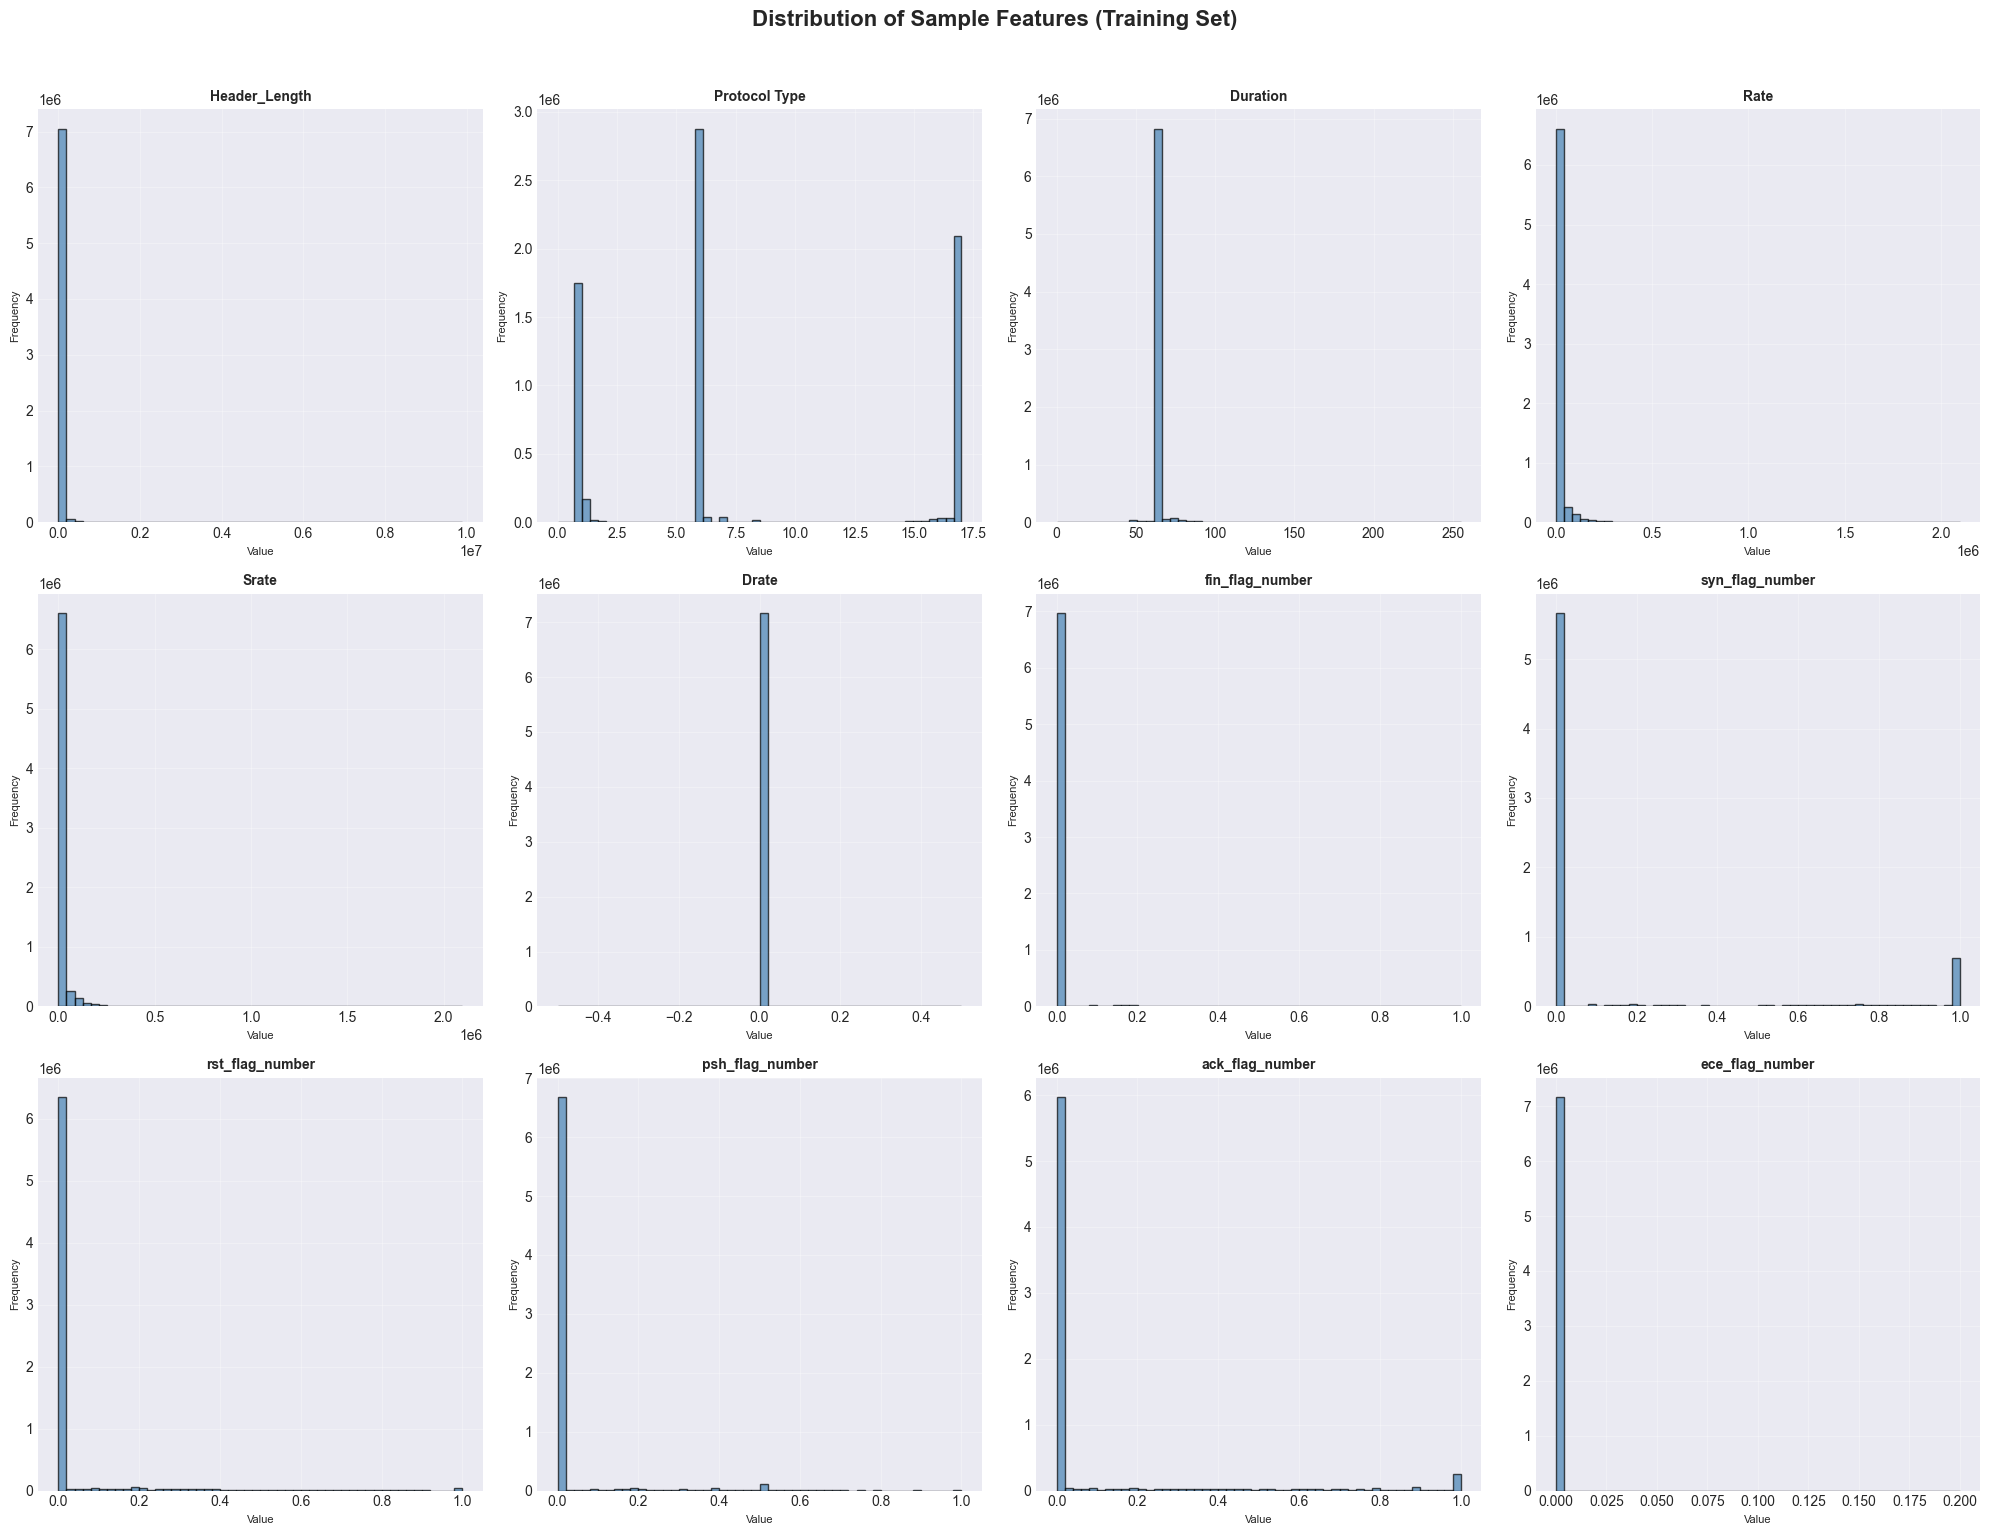

In [11]:
# Select a sample of features for visualization (first 12 numeric features)
sample_features = feature_cols[:12]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(sample_features):
    train_df[feature].hist(bins=50, ax=axes[i], alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{feature}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel('Value', fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)
    axes[i].grid(alpha=0.3)

plt.suptitle('Distribution of Sample Features (Training Set)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 8. Correlation Analysis


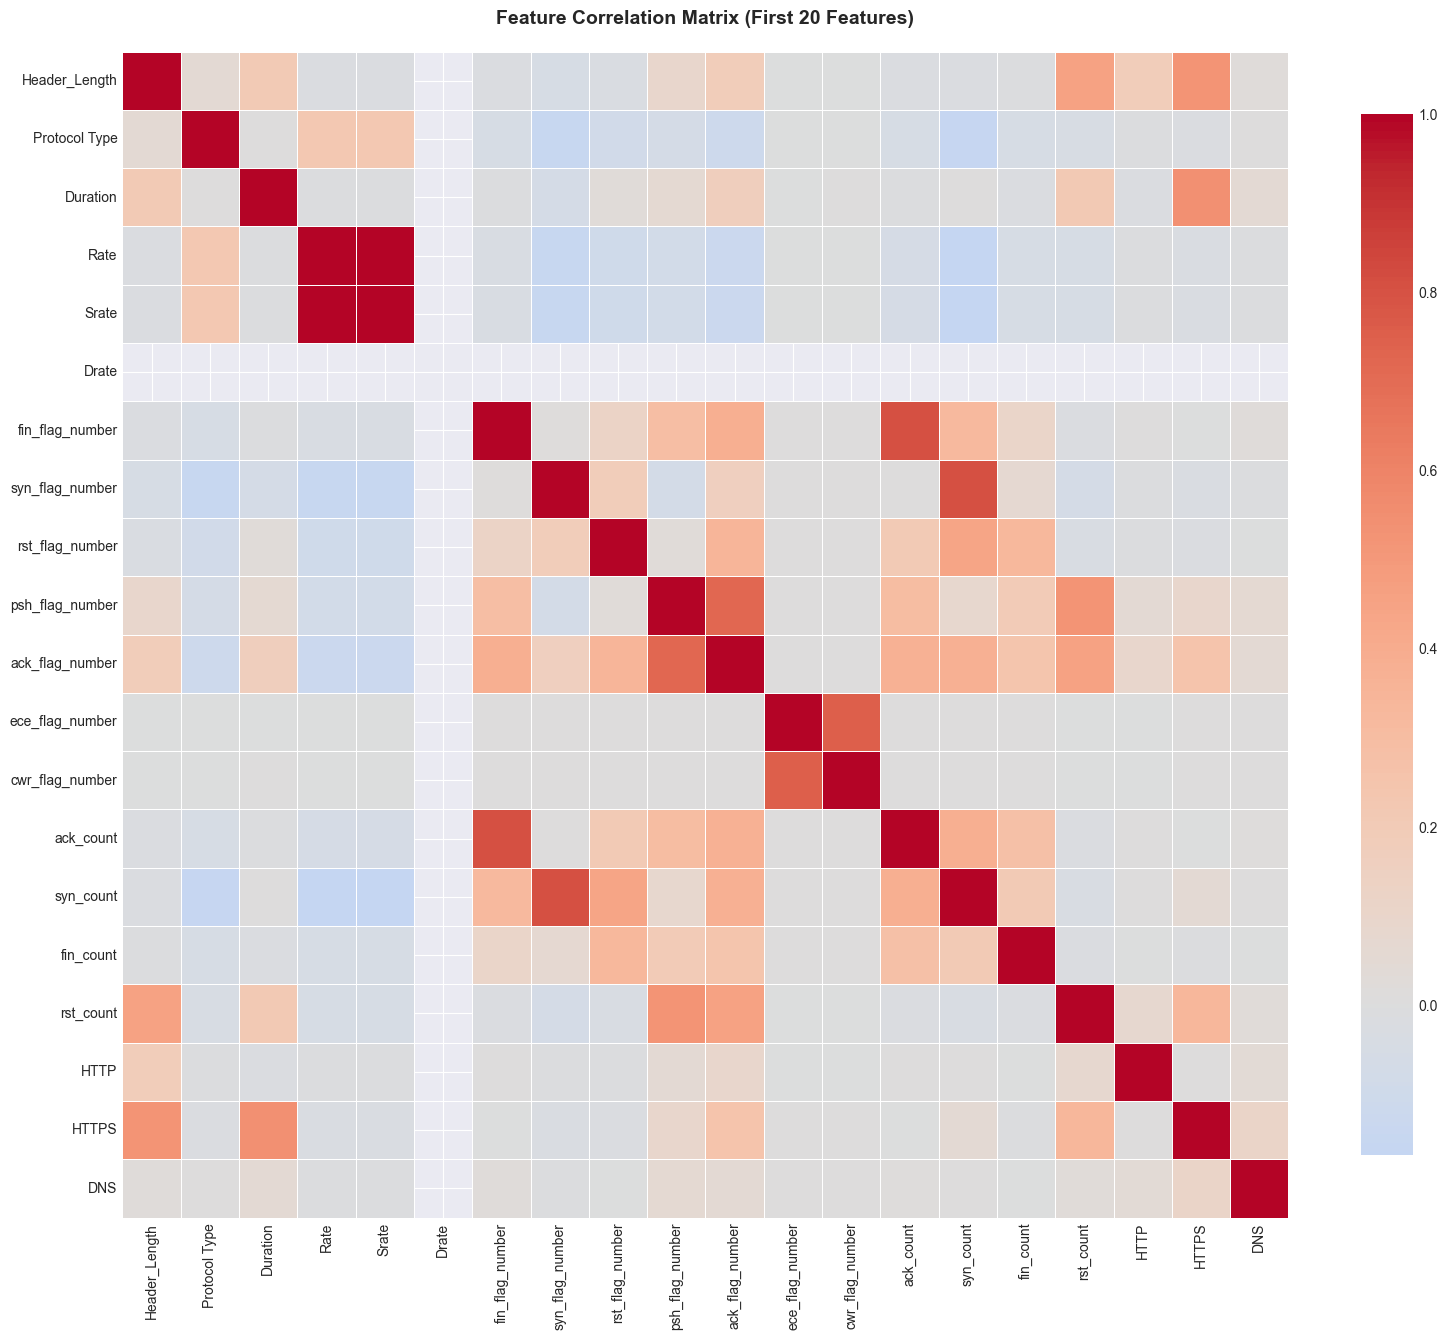

HIGHLY CORRELATED FEATURES (|correlation| > 0.8):
  Rate                           <-> Srate                         :  1.000
  fin_flag_number                <-> ack_count                     :  0.810
  syn_flag_number                <-> syn_count                     :  0.805


In [12]:
# Calculate correlation matrix for a subset of features (to avoid memory issues)
# Select first 20 features for correlation analysis
corr_features = feature_cols[:20]
corr_matrix = train_df[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Feature Correlation Matrix (First 20 Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
print("=" * 80)
print("HIGHLY CORRELATED FEATURES (|correlation| > 0.8):")
print("=" * 80)
high_corr_pairs = []
for i in range(len(corr_features)):
    for j in range(i+1, len(corr_features)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((corr_features[i], corr_features[j], corr_val))

if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs[:10]:  # Show first 10
        print(f"  {feat1:30s} <-> {feat2:30s}: {corr:6.3f}")
else:
    print("  No highly correlated features found (threshold: 0.8)")


## 9. Outlier Detection (Using IQR Method)


In [13]:
# Detect outliers using IQR method for a sample of features
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), len(outliers) / len(df) * 100

# Check outliers for first 10 features
print("=" * 80)
print("OUTLIER DETECTION (IQR Method) - First 10 Features:")
print("=" * 80)
print(f"{'Feature':<30s} {'Outliers':<15s} {'Percentage':<15s}")
print("-" * 60)

outlier_info = []
for feature in feature_cols[:10]:
    count, percentage = detect_outliers_iqr(train_df, feature)
    outlier_info.append((feature, count, percentage))
    print(f"{feature:<30s} {count:<15d} {percentage:<15.2f}%")


OUTLIER DETECTION (IQR Method) - First 10 Features:
Feature                        Outliers        Percentage     
------------------------------------------------------------
Header_Length                  238931          3.34           %
Protocol Type                  0               0.00           %
Duration                       475043          6.63           %
Rate                           514020          7.18           %
Srate                          514020          7.18           %
Drate                          0               0.00           %
fin_flag_number                206586          2.88           %
syn_flag_number                1512468         21.12          %
rst_flag_number                842065          11.76          %
psh_flag_number                538034          7.51           %


## 10. Summary and Key Findings


## 10. Duplicate Rows Analysis


In [15]:
# Detailed duplicate analysis
print("=" * 80)
print("DUPLICATE ROWS - DETAILED ANALYSIS")
print("=" * 80)

# Check duplicates in training set
train_duplicates = train_df.duplicated()
train_dup_count = train_duplicates.sum()
train_total = len(train_df)
train_dup_percentage = (train_dup_count / train_total) * 100

# Check duplicates in test set
test_duplicates = test_df.duplicated()
test_dup_count = test_duplicates.sum()
test_total = len(test_df)
test_dup_percentage = (test_dup_count / test_total) * 100

print(f"\nTraining Set:")
print(f"  Total rows: {train_total:,}")
print(f"  Duplicate rows: {train_dup_count:,} ({train_dup_percentage:.2f}%)")
print(f"  Unique rows: {train_total - train_dup_count:,}")

print(f"\nTest Set:")
print(f"  Total rows: {test_total:,}")
print(f"  Duplicate rows: {test_dup_count:,} ({test_dup_percentage:.2f}%)")
print(f"  Unique rows: {test_total - test_dup_count:,}")

# Check if duplicates include the label column or just features
print("\n" + "-" * 80)
print("Analyzing duplicate types:")
print("-" * 80)

# Duplicates considering ALL columns (including label)
all_col_duplicates = train_df.duplicated()
all_col_dup_count = all_col_duplicates.sum()

# Duplicates considering only FEATURES (excluding label)
feature_cols_only = [col for col in train_df.columns if col != 'label']
feature_duplicates = train_df.duplicated(subset=feature_cols_only)
feature_dup_count = feature_duplicates.sum()

print(f"Duplicates including label column: {all_col_dup_count:,}")
print(f"Duplicates in features only (excluding label): {feature_dup_count:,}")

if feature_dup_count > all_col_dup_count:
    print(f"\n⚠️  WARNING: {feature_dup_count - all_col_dup_count:,} rows have identical features but different labels!")
    print("   This could indicate data quality issues or mislabeling.")


DUPLICATE ROWS - DETAILED ANALYSIS

Training Set:
  Total rows: 7,160,831
  Duplicate rows: 2,645,426 (36.94%)
  Unique rows: 4,515,405

Test Set:
  Total rows: 1,614,182
  Duplicate rows: 721,880 (44.72%)
  Unique rows: 892,302

--------------------------------------------------------------------------------
Analyzing duplicate types:
--------------------------------------------------------------------------------
Duplicates including label column: 2,645,426
Duplicates in features only (excluding label): 2,645,753

⚠️  WARNING: 327 rows have identical features but different labels!
   This could indicate data quality issues or mislabeling.


In [16]:
# Sample some duplicate rows to inspect
print("\n" + "=" * 80)
print("SAMPLE DUPLICATE ROWS:")
print("=" * 80)

# Get indices of duplicate rows
dup_indices = train_df[train_df.duplicated(keep=False)].index[:10]

if len(dup_indices) > 0:
    print(f"\nShowing first 10 duplicate rows (out of {train_dup_count:,}):")
    print("-" * 80)
    display(train_df.loc[dup_indices, ['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'label']].head(10))
else:
    print("No duplicates found to display.")



SAMPLE DUPLICATE ROWS:

Showing first 10 duplicate rows (out of 2,645,426):
--------------------------------------------------------------------------------


,Header_Length,Protocol Type,Duration,Rate,label
413638,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413639,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413640,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413641,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413642,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413643,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413644,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413645,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413646,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train
413647,0.0,1.0,64.0,0.0,TCP_IP-DDoS-ICMP6_train



DUPLICATE DISTRIBUTION BY LABEL:

Top 10 labels with highest duplicate percentage:
--------------------------------------------------------------------------------
  TCP_IP-DDoS-ICMP5_train                 :  97.61% (190,376 duplicates out of 195,032 total)
  TCP_IP-DDoS-ICMP2_train                 :  97.11% (189,179 duplicates out of 194,818 total)
  TCP_IP-DDoS-ICMP6_train                 :  95.72% (182,705 duplicates out of 190,875 total)
  TCP_IP-DDoS-ICMP8_train                 :  95.65% (184,922 duplicates out of 193,340 total)
  TCP_IP-DDoS-TCP3_train                  :  95.63% (195,151 duplicates out of 204,075 total)
  TCP_IP-DDoS-ICMP1_train                 :  95.26% (185,690 duplicates out of 194,938 total)
  TCP_IP-DoS-ICMP3_train                  :  94.83% (103,070 duplicates out of 108,686 total)
  TCP_IP-DDoS-ICMP7_train                 :  93.51% (173,942 duplicates out of 186,022 total)
  TCP_IP-DDoS-ICMP4_train                 :  80.50% (155,156 duplicates out of 192,

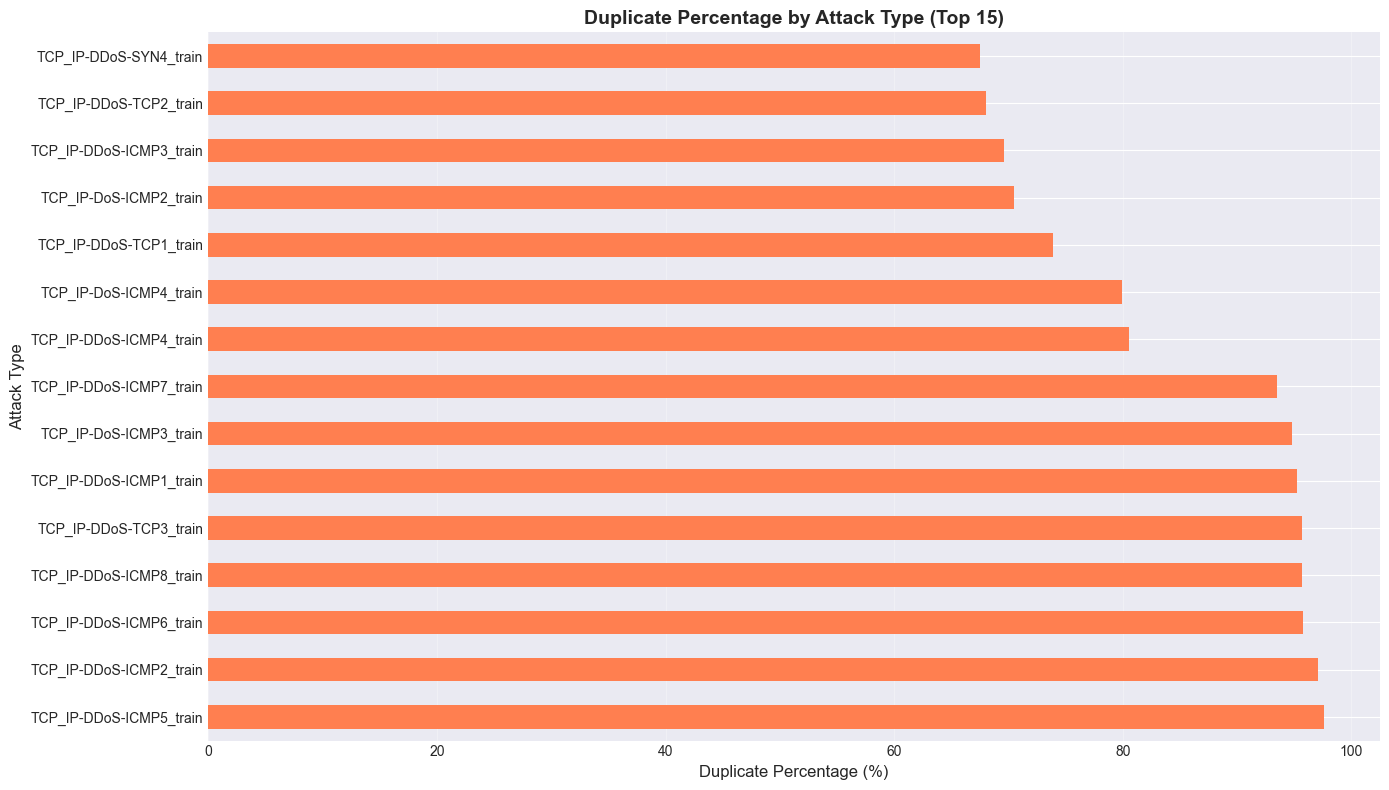

In [17]:
# Visualize duplicate distribution by label
print("\n" + "=" * 80)
print("DUPLICATE DISTRIBUTION BY LABEL:")
print("=" * 80)

# Count duplicates per label
dup_rows = train_df[train_df.duplicated(keep=False)]
dup_by_label = dup_rows['label'].value_counts()
total_by_label = train_df['label'].value_counts()

dup_percentage_by_label = (dup_by_label / total_by_label * 100).sort_values(ascending=False)

print("\nTop 10 labels with highest duplicate percentage:")
print("-" * 80)
for label, pct in dup_percentage_by_label.head(10).items():
    print(f"  {label:40s}: {pct:6.2f}% ({dup_by_label[label]:,} duplicates out of {total_by_label[label]:,} total)")

# Visualization
if len(dup_percentage_by_label) > 0:
    plt.figure(figsize=(14, 8))
    dup_percentage_by_label.head(15).plot(kind='barh', color='coral')
    plt.title('Duplicate Percentage by Attack Type (Top 15)', fontsize=14, fontweight='bold')
    plt.xlabel('Duplicate Percentage (%)', fontsize=12)
    plt.ylabel('Attack Type', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


## 10.1. Duplicate Removal Function


In [ ]:
def remove_exact_duplicates(df, keep='first', verbose=True, return_stats=False):
    """
    Remove exact duplicate rows (same features and labels) from a dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to clean
    keep : {'first', 'last', False}, default='first'
        - 'first': Keep first occurrence of duplicates
        - 'last': Keep last occurrence of duplicates
        - False: Remove all duplicates (including first occurrence)
    verbose : bool, default=True
        If True, prints statistics about duplicates removed
    return_stats : bool, default=False
        If True, returns a dictionary with statistics
    
    Returns:
    --------
    pandas.DataFrame or tuple
        Cleaned dataframe (and optionally statistics dictionary)
    """
    # Store original shape
    original_shape = df.shape
    original_count = len(df)
    
    # Count duplicates before removal
    duplicate_count = df.duplicated().sum()
    
    # Remove exact duplicates
    df_clean = df.drop_duplicates(keep=keep)
    
    # Calculate statistics
    removed_count = original_count - len(df_clean)
    removed_percentage = (removed_count / original_count) * 100 if original_count > 0 else 0
    
    stats = {
        'original_rows': original_count,
        'duplicate_rows': duplicate_count,
        'removed_rows': removed_count,
        'remaining_rows': len(df_clean),
        'removed_percentage': removed_percentage,
        'original_shape': original_shape,
        'cleaned_shape': df_clean.shape
    }
    
    # Print statistics if verbose
    if verbose:
        print("=" * 80)
        print("DUPLICATE REMOVAL SUMMARY")
        print("=" * 80)
        print(f"Original rows: {original_count:,}")
        print(f"Duplicate rows found: {duplicate_count:,}")
        print(f"Removed duplicates: {removed_count:,} ({removed_percentage:.2f}%)")
        print(f"Remaining unique rows: {len(df_clean):,}")
        print(f"Original shape: {original_shape}")
        print(f"Cleaned shape: {df_clean.shape}")
        print("=" * 80)
    
    if return_stats:
        return df_clean, stats
    else:
        return df_clean

print("✓ Duplicate removal function created successfully!")


## 11. Summary and Key Findings


In [ ]:
# Create summary
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - SUMMARY")
print("=" * 80)

summary = {
    'Dataset Size': {
        'Training Samples': len(train_df),
        'Test Samples': len(test_df),
        'Total Samples': len(train_df) + len(test_df)
    },
    'Features': {
        'Number of Features': len(feature_cols),
        'Total Columns': len(train_df.columns)
    },
    'Target Variable': {
        'Number of Classes': train_df['label'].nunique(),
        'Classes': list(train_df['label'].unique())
    },
    'Data Quality': {
        'Missing Values': 'None' if train_df.isnull().sum().sum() == 0 else 'Present',
        'Duplicate Rows': train_df.duplicated().sum()
    }
}

for category, details in summary.items():
    print(f"\n{category}:")
    for key, value in details.items():
        if isinstance(value, list):
            print(f"  {key}: {len(value)} classes")
            if len(value) <= 10:
                for v in value:
                    print(f"    - {v}")
        else:
            print(f"  {key}: {value}")

print("\n" + "=" * 80)
print("Next Steps:")
print("=" * 80)
print("1. ⚠️  PRIORITY: Handle duplicate rows (2.6M+ duplicates found!)")
print("   - Option A: Remove all duplicates (keep='first')")
print("   - Option B: Keep duplicates if they represent valid repeated patterns")
print("   - Option C: Analyze if duplicates have same labels (safe to remove)")
print("2. Handle class imbalance if present")
print("3. Feature scaling/normalization")
print("4. Feature selection (if needed)")
print("5. Encode target labels")
print("6. Split data for validation")
print("7. Prepare data for model training")


EXPLORATORY DATA ANALYSIS - SUMMARY

Dataset Size:
  Training Samples: 7160831
  Test Samples: 1614182
  Total Samples: 8775013

Features:
  Number of Features: 45
  Total Columns: 46

Target Variable:
  Number of Classes: 51
  Classes: 51 classes

Data Quality:
  Missing Values: None
  Duplicate Rows: 2645426

Next Steps:
1. Handle class imbalance if present
2. Feature scaling/normalization
3. Feature selection (if needed)
4. Encode target labels
5. Split data for validation
6. Prepare data for model training
